# This notebook

Note: installing neuron was not that straightforward.





In [65]:
import argparse
import numpy as np
import datetime
import pickle 
import warnings
import neuron
import sys
import csv
#! echo $PYTHONPATH

In [2]:
%run BREPpy.py

#Todo: Read in from command line for int or bool parameters.
b = Brep()
b.init_from_script(['--config_fn','./input_files/Parameters.hoc'])
b.read_in_config()

### Parsing the Parameter file
Not nice: there are about 4 different names for one variable- there are the default ones in the code, the assigned ones in the code, and the ones in the parameter file. 
I will use variables that are similar to the ones defined in the grammar in the code, with the difference that they will be adapted to Python syntax ( _ instead of -), and a few have an additional postfix to clarify what they do (e.g. \_fn = filename) 


### On the installation of neuron
Neuron did not really work out of the box for me. 
I (ubuntu 16.04 LTS, 64 bit) did it the following way:
- Download the .rpm package from here: https://www.neuron.yale.edu/neuron/download
- Install it with: 
    `alien -i nrn_...*package*` (Note that the .deb package did not work out, and neither did the installation using rpm directly)
- Edit the .bashrc file by adding the following lines: 

    `#Added for neuron
    export PYTHONPATH="${PYTHONPATH}:/usr/local/nrn/lib/python/" `
    
    (first check that this path is actually where it got installed by going to the folder and see whether `python -c 'import neuron'` tells you about your NEURON version or whether there ain't no module called neuron.


http://www.davison.webfactional.com/notes/hoc-to-python-bulbnet/

## Checking out the output of the original BREP program.

In [210]:
##filenames and input paths for the different files.
import os
from collections import OrderedDict
res_p = os.path.normpath(os.getcwd()+'/output_1/')

fns = OrderedDict ()
fns['aa_gol_dist']='AAtoGoCdistances.dat'
fns['aa_gol_segs']='AAtoGoCsegments.dat'
fns['aa_gol_source']='AAtoGoCsources.dat'
fns['aa_gol_target']='AAtoGoCtargets.dat'

fns['gran_coord'] ='GCcoordinates.sorted.dat'       
fns['gran_t_coord']='GCTcoordinates.sorted.dat'
    
fns['go_coord']='GoCcoordinates.sorted.dat'
fns['go_basd_coord']='GoCbdendcoordinates.sorted.dat'
fns['go_apical_coord']='GoCadendcoordinates.sorted.dat'
fns['go_axon_coord']='GoCaxoncoordinates.sorted.dat'
fns['go_dist']='GoCdistances.dat' #
       
fns['go_go_dist']='GoCtoGoCdistances.dat'
fns['go_go_sources']='GoCtoGoCsources.dat'
fns['go_go_targets']='GoCtoGoCtargets.dat'
fns['go_go_gap_dist']='GoCtoGoCgapdistances.dat'
fns['go_go_gap_source']='GoCtoGoCgapsources.dat'
fns['go_go_gap_target']='GoCtoGoCgaptargets.dat'

fns['pf_go_dist']='PFtoGoCdistances.dat'
fns['pf_go_seg']='PFtoGoCsegments.dat'
fns['pf_go_source']='PFtoGoCsources.dat'
fns['pf_go_target']='PFtoGoCtargets.dat'

#for k,v in fns.items():
##    print (k)
#a = import_csv(in_f)
#rr = read_in_coordfile (in_goba)

In [159]:

#def import_csv (fn):
def read_in_coordfile (fn):
    res = []
    with open (fn, newline = '') as f:
        rr = csv.reader(f, delimiter = ' ')
        err = []
        for line in rr:
            ar = []
            for j in range(len(line)):
                try: ar.append(float(line[j]))
                except: err.append(line[j])
            res.append(np.asarray(ar))
    if len(err)> 0: print ('Could not parse on {} instances: {}'.format(len(err), set(err)))
    return np.asarray(res)

#rr = read_in_coordfile(fn)

In [174]:
# Visualize Golgi cells
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#read in
coord = read_in_coordfile(res_p +'/'+fns['go_coord'])
apical = read_in_coordfile(res_p +'/'+fns['go_basd_coord'])
basal = read_in_coordfile(res_p +'/'+fns['go_apical_coord'])
axon = read_in_coordfile(res_p +'/'+fns['go_axon_coord'])

#reshape
apical = apical.reshape([apical.shape[0],int(apical.shape[1]/3),3])
basal = basal.reshape([basal.shape[0],int(basal.shape[1]/3),3])
axon = axon.reshape([axon.shape[0],int(axon.shape[1]/3),3])

(200, 3)
Could not parse on 200 instances: {''}
(200, 72)
Could not parse on 200 instances: {''}
(200, 150)
Could not parse on 200 instances: {''}
(200, 120)


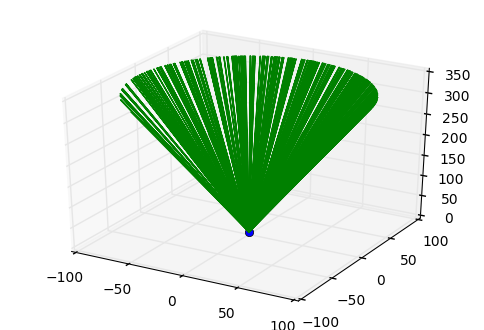

In [205]:
# plot
ns = np.arange(200) #neurons to be plotted.

plot_somata = True
plot_apical = 0
plot_basal = 1
plot_axon = 0
overlay = True

fig = plt.figure()
ax = fig.gca(projection='3d')
if plot_somata: 
    if not overlay: ax.plot(coord[ns,0], coord[ns,1], coord[ns,2], 'bo')
    else: ax.plot ([0],[0],[0],'bo')

#plot dendrites and axon.
for pts, yn, col in [(apical, plot_apical, 'k'), (basal, plot_basal, 'g'), (axon, plot_axon, 'r.')]:
    for i in ns:
        if yn:
            if overlay: pt = pts[i,:,:]-coord[i,:]
            else: pt = pts[i,:,:]
            ax.plot(pt[:,0], pt[:,1], pt[:,2], col)



In [218]:
res = np.zeros((40000, 3))
for i in range(200):
    for j in range(200):
        res[i*200+j,:] = coord[i,:]-coord[j,:]
#dist = [coord[i,:]-coord[j,:] for i,j in range(200)]
dist = read_in_coordfile(res_p +'/'+fns['go_dist'])

print (dist)
print (int(res)

print (res[1:100,:] + dist[:99,:])

[[   0.            1.          142.09308533]
 [   0.            2.          157.44978905]
 [   0.            3.           43.12415203]
 ..., 
 [ 199.          196.           65.79048276]
 [ 199.          197.           95.59447442]
 [ 199.          198.           17.75951662]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.38976073e+00  -4.60488994e-02  -1.42086281e+02]
 [  1.25599784e+00  -5.95654993e-02  -1.57444768e+02]
 ..., 
 [ -2.55784135e+00   2.65460591e-02  -9.55602443e+01]
 [ -2.75896575e+00   1.54630184e-03   1.75439031e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]
[[  1.38976073e+00   9.53951101e-01   6.80399637e-03]
 [  1.25599784e+00   1.94043450e+00   5.02097796e-03]
 [  1.07429216e+00   2.91671447e+00   1.34637012e-02]
 [  1.77021421e+00   3.50838616e+00   1.41424367e-02]
 [  1.53700224e+00   4.39086301e+00   2.37387615e-02]
 [  1.22456592e-01   5.27632701e+00   2.27826531e-02]
 [  1.56886909e+00   5.89986858e+00   6.69088222e+01]
 [  1.852968

In [160]:
for k, v in fns.items():
    print ('Read in file: ', v)
    c_p = os.getcwd()+'/output_1/'+v
    cur = read_in_coordfile(c_p)
    
    c_p2 = os.getcwd()+'/output_2/'+v
    cur2 = read_in_coordfile(c_p2)

    print ('Shape 1 is: ', cur.shape)
    print ('Shape 2 is: ', cur2.shape)
    
    print ('First elements in 1 are:', cur.flatten()[:15])
    print ('First elements in 2 are:', cur2.flatten()[:15])
    
    print (' ')

Read in file:  AAtoGoCdistances.dat
Shape 1 is:  (6710504, 1)
Shape 2 is:  (6791558, 1)
First elements in 1 are: [  72.40834762  134.96968328  134.16163914   57.545658    132.6008968
  131.98243735   54.86484883  131.93994811   54.41139699  131.33764955
   54.84450738   54.73146502  131.55278608   54.29964586   53.71808993]
First elements in 2 are: [ 211.2796311   211.26980386  210.67810779  209.55052216  132.6845687
  209.4256309   132.61236629  132.53076982  208.84039181  132.14997176
  209.00578191   55.24744928  209.00317589  209.14315443  132.33628668]
 
Read in file:  AAtoGoCsegments.dat
Shape 1 is:  (6710504, 2)
Shape 2 is:  (6791558, 2)
First elements in 1 are: [ 1.  3.  1.  3.  1.  3.  1.  3.  1.  3.  1.  3.  1.  3.  1.]
First elements in 2 are: [ 1.  3.  1.  3.  1.  3.  1.  3.  1.  3.  1.  3.  1.  3.  1.]
 
Read in file:  AAtoGoCsources.dat
Shape 1 is:  (6710504, 1)
Shape 2 is:  (6791558, 1)
First elements in 1 are: [ 9838.  8704.  8734.  9781.  8713.  8744.  9773.  8526.  97

On kd-Trees:
- binary search stree
    - every branching node contains a k-dimensional point
    - every leaf node contains a set of points
- every branching node represents a splitting hyperplane that divides the space into two half-spaces    
    - left of the splitting hyperplane = left subtree, same for richt
    - each spliitting hyperplane is perpendicular to one of the axes in the k-dimensional space
    - the axes for the splitting hyperplanes are rotating

On the chicken kd-tree library:
- works with datastructure POINT3D
    - constructor: make-point3d dbl dbl dbl 
    - accessors point3d-x /y/z
    - predicate: point3d?
- KD-Tree itself
    - constructor: list->kd-tree (list of POINT3D)
    - predicates: kd-tree? -> checks object, kd-tree-empty?, 
        - kd-tree-is-valid? -> checks if all points in subtree lie on left side of hyperplane and right on right
        - kd-tree-all-subtrees-are-valid? -> valid property for all branching nodes?
    - accessors: 
        - kd-tree->list  -> all the points contained in tree in a POINT3D list
        - kd-tree->list\* -> list with elements of the form (i . POINT3D) -> i is the relative integer index of the point
     
for other accessors, the author was not motivated enough to write a description.


In [132]:
print (rr.shape)
ri = rr[:,0]
ro = rr[0,:]

import matplotlib.pyplot as plt
%matplotlib inline
for j in range(3):
    plt.figure()
    for i in range(len(rr)):
        g = rr[i,:].reshape([50,3])
        plt.plot(g[:25,j])
        plt.plot(g[25:,j])
        
plt.figure()
for i in range(len(rr)):
    g = rr[i,:].reshape([50,3])
    plt.plot(g[24,0], g[24,1], 'kx')
    plt.plot(g[49,0], g[49,1], 'rx')

(200, 72)


ValueError: cannot reshape array of size 72 into shape (50,3)

### Checking out the kd-tree libraries

Scipy:
- Documentation: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html
- Source Code: https://github.com/scipy/scipy/blob/master/scipy/spatial/kdtree.py
- Algorithm reference Maneewongvatana and Mount 1999
- Can be queried for r nearest neighbors, however r should be relatively small because elsewise, brute force is just as efficient.
- Approximate nearest neighbors seems to be another, and much faster option, and might work well for us.
- Uses pythonic libraries. 
- The heap queue algorithm: https://github.com/python/cpython/blob/2.7/Lib/heapq.py seems to be used, but it is also in python


SKlearn:
- Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html
- Source Code: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neighbors/kd_tree.pyx
- uses cython. Might thus be faster. Let's check.


Neither of them appears to have parallelization supported right from the beginning.
Both just take regular arrays as inputs.


Could be interesting:
http://ieeexplore.ieee.org/abstract/document/5654017/?reload=true
GPU implementation for kNN search
Following this:
https://link.springer.com/chapter/10.1007/978-3-642-38628-2_67



In [50]:
from scipy.spatial import KDTree as T_sp
from sklearn.neighbors import KDTree as T_sk
s_dat = np.asarray(import_csv(fn_out))
import time

rn = np.random.randint(0, len(s_dat), 50)
nn = 10

In [51]:
print (s_dat.shape)

(798000, 3)


In [60]:
k_dist = np.zeros((len(rn), nn))
k_ind = np.zeros((len(rn), nn))
tk0 = time.time()
kt = T_sk(s_dat)
tk1 = time.time()
for i, ii in enumerate(rn):
    warnings.simplefilter('ignore') #definitely not ideal. But no clue how the validation file gets called
    k_dist[i,:], k_ind [i,:] = kt.query(s_dat[ii,:], k = nn)
tk2 = time.time()

In [53]:
p_dist = np.zeros((len(rn), nn))
p_ind = np.zeros((len(rn), nn))
tp0 = time.time()
pt = T_sp(s_dat)
tp1 = time.time()
for i, ii in enumerate(rn):
    p_dist[i,:], p_ind [i,:] = pt.query(s_dat[ii,:], k = nn)
tp2 = time.time()

In [70]:
#Here is the first, blunt comparison of both algorithms in terms of time:
print (tk1-tk0)
print (tp1-tp0)

print (tk2-tk1)
print (tp2-tp1)
#Scikit-learn is way faster.

#print (np.isclose (k_dist, p_dist))
#print (k_ind -p_ind) 
# Where the indices are not the same it is because the distances are equal.

1.112079381942749
4.108412981033325
0.004629611968994141
0.04588818550109863


In [90]:
# Reading in, subsampling and storing again the csv files in order to have a smaller dataset at hand that has a similar density anyway.

import csv

fn_in = 'input_files/GCTcoordinates.dat'
fn_out = 'input_files/GCT_small.dat' #100x150 -> 11 k
fn_out2 = 'input_files/GCT_smallsmall.dat' #30x100 -> 2.2k
fn_out3 = 'input_files/GCT_tiny.dat' # 2x5 ->  6

x_r = [0.0, 2.0]
y_r = [0.0, 5.0]
z_r = [0.0, 1000.0]
rrs = [x_r, y_r, z_r]

def subsample_coords (rrs, fn_in, fn_out = 'input_files/downsampled.dat', save = True):
    res = []
    rnr = [0, 0]
    with open(fn_in, newline = '') as f, open (fn_out, 'w', newline = '') as w_f:
        rr = csv.reader(f, delimiter = ' ')
        if save: wr = csv.writer(w_f, delimiter = ' ')
        for line in rr:
            in_range = all([float(line[i])>rrs[i][0] and float(line[i])<rrs[i][1] for i in range(len(rrs))]) #check if in range
            if in_range: 
                if save: wr.writerow([float(line[j]) for j in range(len(rrs))])
                res.append([float(line[j]) for j in range(len(rrs))])
                rnr[0] = rnr[0]+1
            else:
                rnr[1] = rnr[1]+1
    print ('Subsampled {} of {}'.format(rnr[0], rnr[1]))
    return res

#my_s = subsample_coords (rrs, fn_in, fn_out3, save = True)

def import_csv (fn):
    res = []
    with open (fn, newline = '') as f:
        rr = csv.reader(f, delimiter = ' ')
        for line in rr:
            res.append([float(line[j]) for j in range(len(line))])
    return np.asarray(res)


# Random and deprecated stuff below this.

In [39]:
# Development site for the read_in_config function.

#from neuron import hoc, h
# weird thing that I did not get yet: despite all the copy statements, the second time you calculate d_l, it would give 0. 
# Thus, the hoc objects must somehow take on each other's parameters... 

#load an empty hoc object and find out which parameters are native to that object (probably useless...)
empty_hoc = dir(neuron.hoc.HocObject()).copy()
config_fn = './input_files/Parameters.hoc'
overwrite_config =  True
#load our own hoc object from the parameter file, get the disjunct list of parameters (probably useless...)
neuron.h.xopen(config_fn)
full_hoc = dir(neuron.h)
if 'd_l' not in globals():
    d_l = list (set (full_hoc)  - set (empty_hoc)).copy()

#c_d = b.config_dict
c_d = dict((v,k) for k,v in b.config_dict.items()) #exchange key and value
#this dict translates the parameters used in the Parameters file to the ones used in the code
# Check if the Brep object contains the right parameters and if so, change them.
# Note: Resolve conflicts with the command line - I think default should be that command line should has priority 
self = b
for h_k in full_hoc:
    if h_k in c_d.keys() and h_k not in self.cl_args.keys():
        if hasattr (self.args, c_d[h_k]):
            setattr (self.args, c_d[h_k], getattr (neuron.h, h_k))
        else:
            print ('Did not find {}'.format(c_d[h_k]))
    elif h_k in c_d.keys() and h_k in self.cl_args.keys():
        if hasattr (self.args, c_d[h_k]):
            if overwrite_config:
                warnings.warn('Parameter {} was set both by command line and in config, will use value from command line'.format(c_d[h_k]))
            else:
                warnings.warn('Parameter {} was set both by command line and in config, will use value from config file'.format(c_d[h_k]))
                setattr (self.args, c_d[h_k], getattr (neuron.h, h_k))
    
# The following two parameters are an exception:
if 'GLdepth' in d_l and 'PCLdepth' in d_l and not 'aa-length' in self.cl_args.keys():
    setattr (self.args, 'aa-length', getattr(neuron.h, 'GLdepth')+getattr(neuron.h,'PCLdepth'))
    


Nseg for APical is 5 and Basal is 3
	36 


In [41]:
### The transformations of the parameters, automized in a small parser script.

#Had to be done only once, but will be kept for reference.

from neuron import hoc, h
# weird thing that I did not get yet: despite all the copy statements, the second time you calculate d_l, it would give 0. 
# Thus, the hoc objects must somehow take on each other's parameters... 

#load an empty hoc object and find out which parameters are native to that object (probably useless...)
empty_hoc = dir(hoc.HocObject()).copy()
config_fn = './input_files/Parameters.hoc'
#load our own hoc object from the parameter file, get the disjunct list of parameters (probably useless...)
h.xopen(config_fn)
full_hoc = dir(h).copy()
if 'd_l' not in globals():
    d_l = list (set (full_hoc)  - set (empty_hoc)).copy()

# Code file
tf = 'brep_commented.scm'
# Step one: parse all lines that contain both config or options as those are the ones that 
res_dict = {}
with open (tf, 'rb') as tff:
    for line in tff:
        st = str(line)
        c = st.find ("config '")
        o = st.find ("options '") 
        if c > 0 and o > 0:
            c_clb = st[c:].find (')')
            o_clb = st[o:].find (')')
            res_dict[st[c+8:c+c_clb]] = st[o+9:o+o_clb] 
    tff.close()

#parameters that are defined in the res file but have not been parsed yet
rest_hk = (set (d_l)- set(res_dict.keys()))
rem = {}
#check if they occur in the code
with open ('brep_commented.scm', 'rb') as f_in:
    n = 0
    for line in f_in:
        n = n+1
        for w in rest_hk:
            if str(line).find(w)>0:
                if w in rem.keys():
                    rem[w].append(n)
                else:
                    rem[w] = [n]                  
print (rem) # 'TS is coincidental, the other two parameters are taken seperate care of.

#print the resulting dict to a file.
with open ('par_d2.txt', 'w') as f_out:
    for k in res_dict.keys():
        f_out.write("'" +res_dict[k]+ "' : '"+k+ "', \n" )

#print (res_dict)

ImportError: No module named 'neuron'

In [5]:
#Used this to try out command line calls. 

#Brep = importlib.reload(BREPpy)
#stupid workaround so that the known command line call can be kept up.
#I think I changed something, would have to git checkout....
class Brep2 (Brep, b):
    def __init__:
        self.args = b.args
        self.config_dict = b.config_dict
        self.cl_args = b.cl_args
        


def new_Brep (arg_dict = {}, **kwargs):
    if True: #delete and make new Brep file
        ! python ~/Desktop/LabRot_OIST/pybrep/BREPpy.py --config_file blabla 
        a = pkl.load(open('./tmp.pkl', 'rb'))
        ! rm tmp.pkl
        b = Brep2(a)
    else: b = Brep2(pkl.load(open('./tmp.pkl', 'rb'))) 
    #Process and add arguments    
    arg_dict.update(kwargs)
    for k in arg_dict.keys():
        if hasattr (b.args, k):
            setattr (b.args, k, arg_dict[k])
        else:
            warnings.warn ('Keyline argument {} not known'.format(k))
            
    return b

arg_dict = {'config_file': 'blabla.c',
            'verbose': True}
b = new_Brep(arg_dict, gc_points_fn = 'yipyip' )


I
Traceback (most recent call last):
  File "/home/ines/Desktop/LabRot_OIST/pybrep/BREPpy.py", line 134, in <module>
    Brep().initialize_and_dump()
  File "/home/ines/Desktop/LabRot_OIST/pybrep/BREPpy.py", line 123, in initialize_and_dump
    self.cl_args = self.parser.convert_arg_line_to_args()
TypeError: convert_arg_line_to_args() missing 1 required positional argument: 'arg_line'


FileNotFoundError: [Errno 2] No such file or directory: './tmp.pkl'

In [52]:
## Fun with magic

# http://ipython.readthedocs.io/en/stable/interactive/magics.html
#notable ones
# %debug #-> debug stuff. Lets you inspect the stack frame of an exception interactively
# %env #-> see all env variables

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-52-e95a52b59324>, line 7)

I


TypeError: convert_arg_line_to_args() missing 1 required positional argument: 'arg_line'